# Recreation & Fitness facilities


***Author***: Fabian Georgi (s0563263) <br>
***Date***: 2018-11-18 <br>

## Importieren der Libraries/Frameworks

In [48]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## Festlegen der Dateipfade

In [49]:
# File pathes for quick adjustment if places or directories change.
path_input = '00_data_input'
path_temp = '01_data_temp'
path_inter = '02_data_intermediate'
path_output = '03_data_output'
path_atlas = os.path.join(path_input, 'food_atlas.xls')
path_fitness = os.path.join(path_inter, 'fitness_refined_data.csv')

## Extraktion der relevanten Daten

>**Initial Dataframe**  
>We use data provided by:
>**United States Department of Agriculture**  
>https://www.ers.usda.gov/data-products/food-environment-atlas/data-access-and-documentation-downloads/#Current%20Version  
>This data is provided as an Excel file with multiple sheets.
>The values of the food atlas are collected for each US county which are identified by their FIPS-code.

In [50]:
# Load the health table from the food atlas data and extract the columns dealing with obesity.
df_health = pd.read_excel(path_atlas, sheet_name='HEALTH')
df_fitness = df_health[['FIPS', 'RECFAC09', 'RECFAC14', 'PCH_RECFAC_09_14', 'RECFACPTH09', 'RECFACPTH14', 'PCH_RECFACPTH_09_14']].copy()

# Show some information about the dataframe we extracted so far.
print('{:<25} {:d}'.format('Number of entries:', len(df_fitness.index)))
df_fitness[:5]

Number of entries:        3143


,FIPS,RECFAC09,RECFAC14,PCH_RECFAC_09_14,RECFACPTH09,RECFACPTH14,PCH_RECFACPTH_09_14
0,1001,4,5,25.000000,0.073889,0.090261,22.156783
1,1003,18,25,38.888889,0.100331,0.124931,24.518392
2,1005,1,0,-100.000000,0.036157,0.000000,-100.000000
3,1007,1,1,0.000000,0.043590,0.044433,1.932818
4,1009,3,3,0.000000,0.052319,0.051976,-0.654897


In [51]:
# Rename the columns to allow for better reading and referencing in the future.
df_fitness.rename(columns={'FIPS': 'county_fips', 'RECFAC09':'ABS_facilities_2009','RECFAC14':'ABS_facilities_2014','PCH_RECFAC_09_14':'PCT_facilities_change', 'RECFACPTH09':'ABS_facilities_per_thousand_pop_2009', 'RECFACPTH14':'ABS_facilities_per_thousand_pop_2014', 'PCH_RECFACPTH_09_14':'PCT_facilities_per_thousand_pop_change'}, inplace=True)
df_fitness[:5]

,county_fips,ABS_facilities_2009,ABS_facilities_2014,PCT_facilities_change,ABS_facilities_per_thousand_pop_2009,ABS_facilities_per_thousand_pop_2014,PCT_facilities_per_thousand_pop_change
0,1001,4,5,25.000000,0.073889,0.090261,22.156783
1,1003,18,25,38.888889,0.100331,0.124931,24.518392
2,1005,1,0,-100.000000,0.036157,0.000000,-100.000000
3,1007,1,1,0.000000,0.043590,0.044433,1.932818
4,1009,3,3,0.000000,0.052319,0.051976,-0.654897


**Saving the data for later use**

In [52]:
df_fitness.to_csv(path_fitness)

## Plotten der Daten

In [53]:
def plot_distribution2(title, series, bins, color):
    sns.set_color_codes()
    sns.set(font_scale=1.4)
    plt.subplots(figsize=(20,8))
    plt.title(title) 
    sns.distplot(series.dropna(), bins=bins, color=color, kde=False)
    
    
    
def plot_distribution(title, series, lower_limit, upper_limit, bin_precision, y_limit, color):
    bins = np.linspace(lower_limit, upper_limit, ((upper_limit - lower_limit) / bin_precision) + 1)
    sns.set_color_codes()
    sns.set(font_scale=1.4)
    plt.subplots(figsize=(20,8))
    plt.title(title) 
    plt.xlim(lower_limit, upper_limit)
    plt.ylim(0, y_limit)
    sns.distplot(series.dropna(), bins=bins, color=color, kde=False)

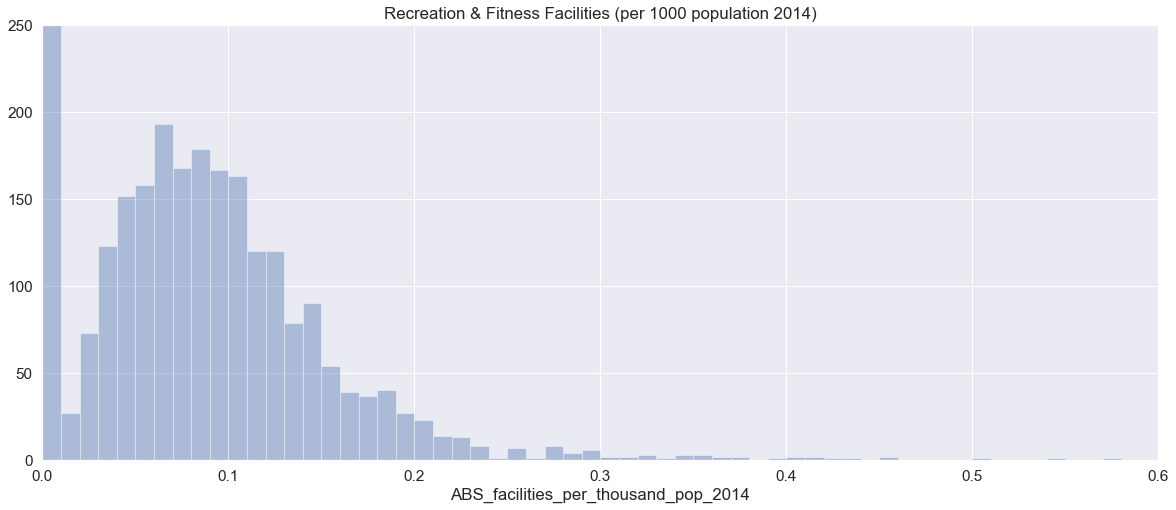

In [54]:
plot_distribution('Recreation & Fitness Facilities (per 1000 population 2014)', df_fitness['ABS_facilities_per_thousand_pop_2014'], 0, 0.6, 0.01, 250, 'b')

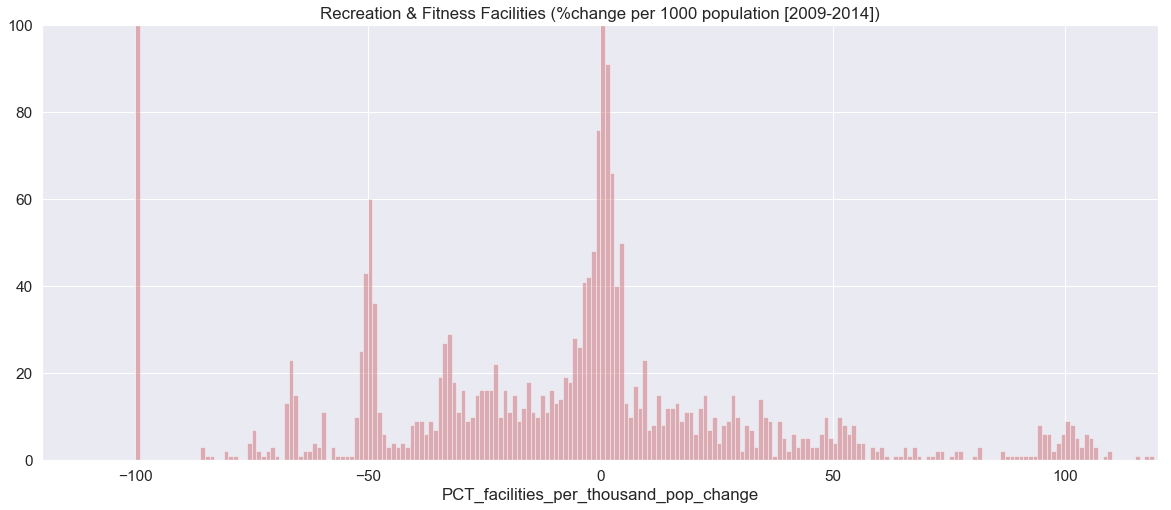

In [55]:
plot_distribution('Recreation & Fitness Facilities (%change per 1000 population [2009-2014])', df_fitness['PCT_facilities_per_thousand_pop_change'], -120, 120, 1, 100, 'r')


# Obesity und Recreation & Fitness Facilities

**Importieren/Laden der anderen Dateien**

In [56]:
path_obesity = os.path.join(path_inter, 'obesity_refined_data.csv')
df_obesity = pd.read_csv(path_obesity)

**Mergen der beiden Datensätze**

In [57]:
df_obese_fitness = df_obesity[['county_fips','PCT_obese_adults_2013','PCT_obese_adults_change']]
df_obese_fitness = df_obese_fitness.merge(df_fitness[['county_fips','ABS_facilities_per_thousand_pop_2014', 'PCT_facilities_per_thousand_pop_change']], how='inner', on='county_fips')
df_obese_fitness[:4]

,county_fips,PCT_obese_adults_2013,PCT_obese_adults_change,ABS_facilities_per_thousand_pop_2014,PCT_facilities_per_thousand_pop_change
0,1001,34.1,2.6,0.090261,22.156783
1,1003,27.4,1.2,0.124931,24.518392
2,1005,44.4,6.8,0.000000,-100.000000
3,1007,40.3,8.0,0.044433,1.932818


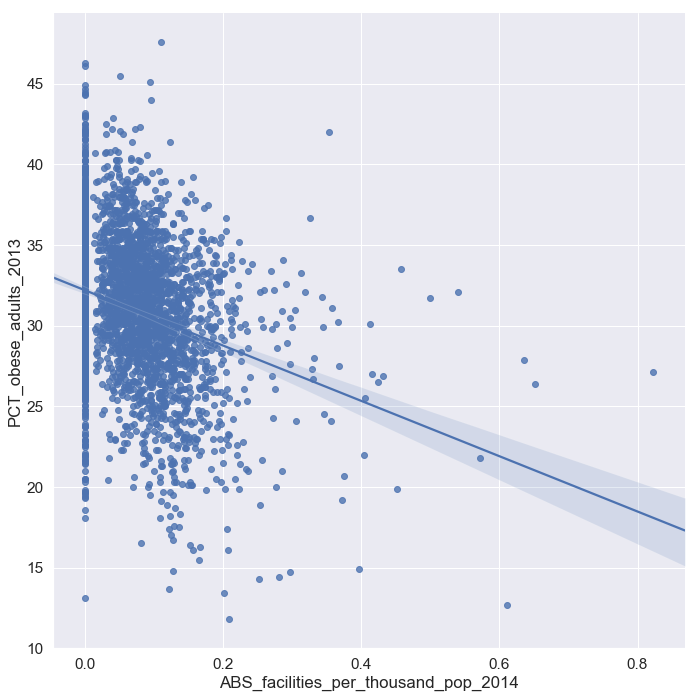

In [58]:
sns.lmplot(x='ABS_facilities_per_thousand_pop_2014', y='PCT_obese_adults_2013', data=df_obese_fitness, size=10)

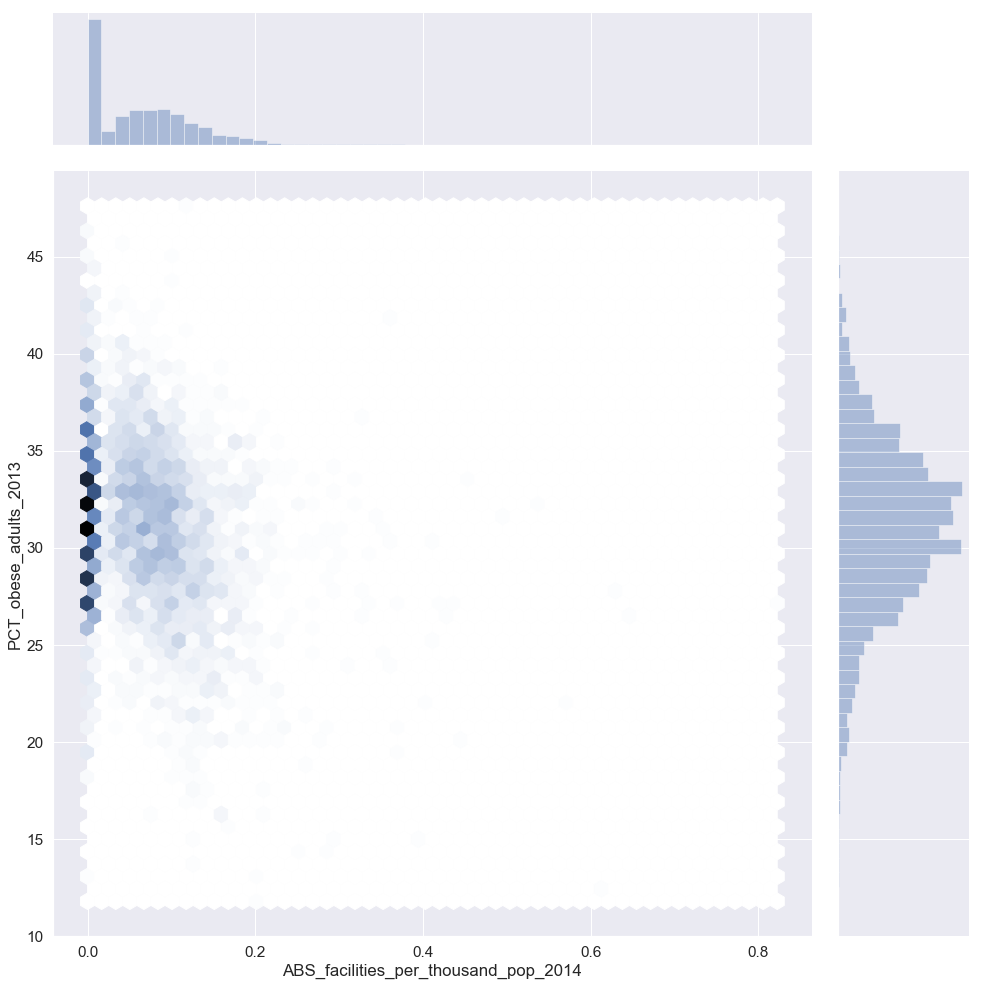

In [59]:
sns.jointplot(x='ABS_facilities_per_thousand_pop_2014', y='PCT_obese_adults_2013', data=df_obese_fitness, kind='hex', size=14)

**Prozentuale Veränderung über die Jahre beider Zahlen** 
> keine schöne Aussage

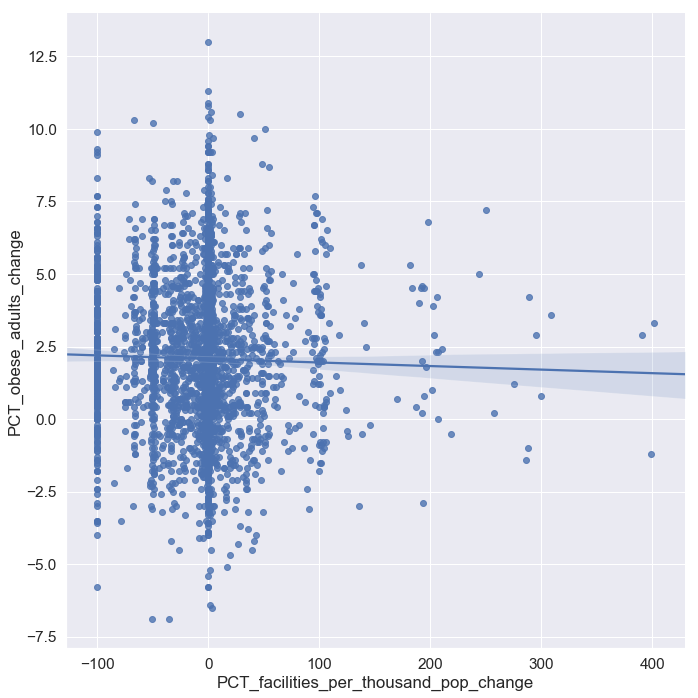

In [60]:
sns.lmplot(x='PCT_facilities_per_thousand_pop_change', y='PCT_obese_adults_change', data=df_obese_fitness, size=10)

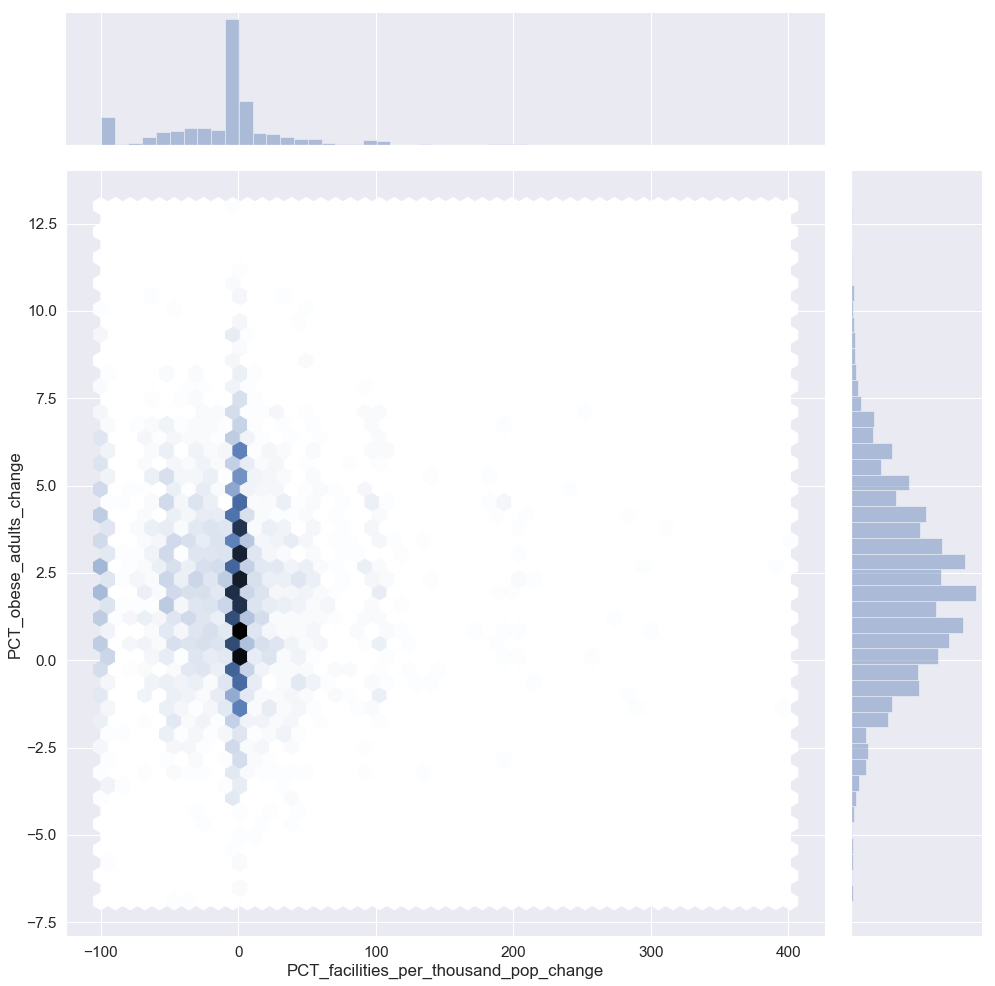

In [61]:
sns.jointplot(x='PCT_facilities_per_thousand_pop_change', y='PCT_obese_adults_change', data=df_obese_fitness, kind='hex', size=14)